In [1]:
from text_analytics_fns import *
%matplotlib inline

load params
loading model
creating tensorflow session
create model
embd function
loading Parameters
create mlstm
loading Parameters
loading Parameters
loading Parameters
loading Parameters
loading Parameters
loading Parameters
loading Parameters
loading Parameters
loading Parameters
fully connected layer creation
loading Parameters
loading Parameters


### trending topics

In [11]:
get_twitter_trend('bangalore')

bangalore 23424848


['happybirthdaydeepikapadukone',
 'tukdetukdegang',
 'iplretention',
 'tskpressmeet',
 'kerpun',
 'kabul',
 'rs',
 'specialwatchlist',
 'manmohansingh',
 'bbmuseum',
 'learningtolovenehru',
 'keralacm',
 'quickheal',
 'mountbb',
 'jodhpur',
 'karnatakacm',
 'dalit',
 'rajyasabha',
 'umarkhalid',
 'talaqbilldivorced',
 'htanalysis',
 'terebina',
 'imaikkaanodigal',
 'busstrike',
 'savsind',
 'awdvmum',
 'toiwriteindia',
 'transport',
 'eeda',
 'maharashtrabandh',
 'thursdaythoughts',
 'kulbhushanjadhav',
 'bhimakoregaonviolence',
 'tiktiktikaudiolaunch',
 'baaghi',
 'fodderscam',
 'hubahu',
 'takeastep',
 'yaarivan',
 'kejriwal',
 'aweteaser',
 'ezeeresolution',
 'deepakrao',
 'dhaadikaara',
 'nayasaalwithearlysalary',
 'mybirthdaysongtrailer',
 'hbddeependerhooda',
 'natchathiravizha',
 'marol',
 'thalapathy']

## Blog/news analytics
### getting webhose(blog/news data)  
### preprocessing them

### realtime data
##### loading realtime news/blog data

In [2]:
keywords=["mumbai","bandh"]
data_realtime=get_blog_data_realtime(keyword=keywords)

Too many requests: used 1000 out of 1000 allowed in a month
less than 10 requests are left


### historical data
##### loading historical news/blog data

In [2]:
keywords=["mumbai","bandh"]
data_historical=get_blog_data_historical(keyword=keywords,timeduration=20)

Too many requests: used 1000 out of 1000 allowed in a month
less than 10 requests are left


### processing sentiment 
#### on whole data

In [3]:
data_sentiment=get_sentiment_blog(data_historical,keywords, source='blogs',take_all_data=True)

(200, 29)
(135, 30)


/home/ubuntu/Notebooks/NLP_and_Text_Analysis/sentiment analysis/on twitter data/text_analytics_fns.py:304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  op_all['published']=pd.DatetimeIndex(op_all['published'])
/home/ubuntu/Notebooks/NLP_and_Text_Analysis/sentiment analysis/on twitter data/text_analytics_fns.py:305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  op_all['stats']=pd.DataFrame(sentiments_stat)
/home/ubuntu/Notebooks/NLP_and_Text_Analysis/sentiment analysis/on twitter data/text_analytics_fns.py:306: SettingWithCopyWarning: 
A va

#### on blog

In [6]:
data_sentiment_blog=get_sentiment_blog(data_historical,keywords, source='blogs')

(200, 30)
(36, 30)


#### on news

In [7]:
data_sentiment_news=get_sentiment_blog(data_historical,keywords, source='news')

(200, 30)
(99, 30)


### displaying blog output

#### keywords from blogs

In [10]:
get_tfidf_keywords(data_sentiment_blog['text'].tolist())

,feature_names,scores
11274,maharashtra,0.032738
12234,mumbai,0.030058
9226,india,0.024359
5205,dalit,0.024349
16204,said,0.024323
4908,cr,0.022689
16033,rs,0.021690
7983,government,0.020548
17560,state,0.020025
5270,dalits,0.019671


#### keywords from news

In [11]:
get_tfidf_keywords(data_sentiment_news['text'].tolist())

,feature_names,scores
21796,maharashtra,0.030248
24039,mumbai,0.027951
40258,violence,0.026216
20272,koregaon,0.025874
32719,said,0.025662
5290,bhima,0.024533
10269,dalit,0.023629
29749,pune,0.021919
5320,bhima koregaon,0.021520
17930,india,0.021297


#### total number hits(news/blogs) w.r.t. time

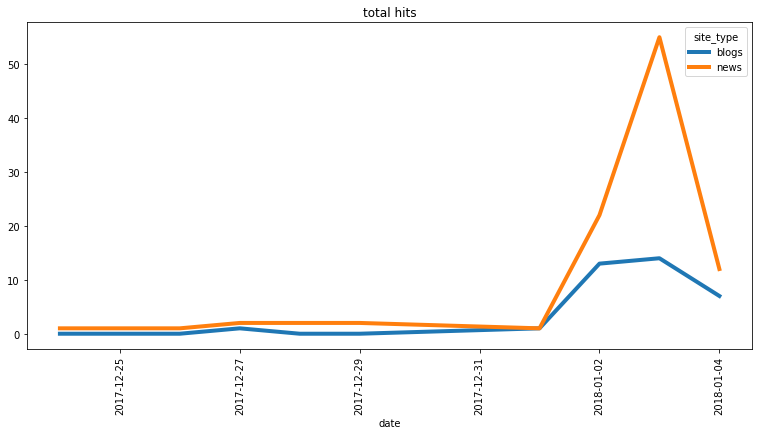

In [8]:
total_hits=data_sentiment.pivot_table(columns='site_type',index='date'\
                   ,values='median_sentiment_level',aggfunc='count').fillna(0)
total_hits.plot(figsize=(13,6),rot=90,lw=4,title='total hits')

#### mean sentiment w.r.t. time

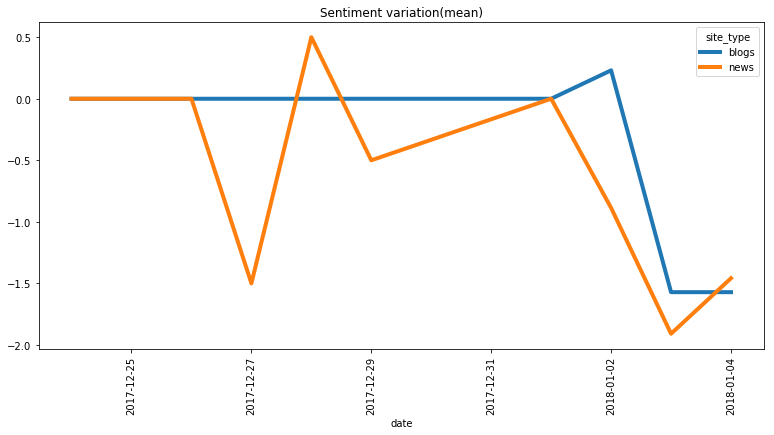

In [9]:
sentiment_levels=data_sentiment.pivot_table(columns='site_type',index='date',\
                   values='median_sentiment_level',aggfunc='mean').fillna(0)
sentiment_levels.plot(figsize=(13,6),rot=90,lw=4,title='Sentiment variation(mean)')

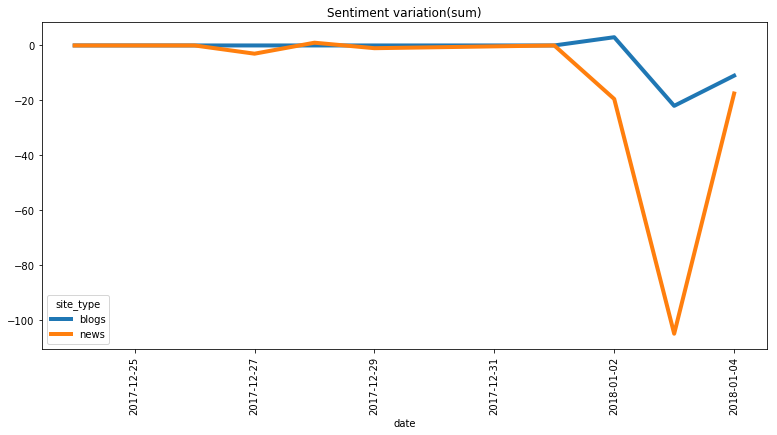

In [10]:
sentiment_levels=data_sentiment.pivot_table(columns='site_type',index='date',\
                   values='median_sentiment_level',aggfunc='sum').fillna(0)
sentiment_levels.plot(figsize=(13,6),rot=90,lw=4,title='Sentiment variation(sum)')

#### sentiment description w.r.t. site types

In [5]:
site_stat=data_sentiment.groupby('site_type').agg({'median_sentiment_level':['mean','max','median','std','count']})
site_stat

median_sentiment_level                            
                            mean  max median       std count
site_type                                                   
blogs                  -0.833333  2.0    0.0  1.828348    36
news                   -1.464646  1.0   -1.0  2.155028    99

In [11]:
# #### mean sentiment w.r.t.  source
# sent_source=data_sentiment.head(100).groupby(['site','site_type']).agg({'median_sentiment_level':'mean'})
# sent_source.plot(kind='barh',figsize=(10,min(50,int(.5*sent_source.shape[0]))),lw=4,title='mean sentiment level')

### summary from blog output

#### getting  summarized text for each text

In [5]:
print(summarize_combined(data_sentiment['text'].tolist()))

The Battle of Koregaon was fought on January 1, 1818 between the British East India Company and the Peshwa faction of the Maratha Confederacy, at Koregaon Bhima. The Battle of Koregaon was fought on January 1, 1818 between the British East India Company and the Peshwa faction of the Maratha Confederacy, at Koregaon Bhima. The Battle of Koregaon was fought on January 1, 1818 between the British East India Company and the Peshwa faction of the Maratha Confederacy, at Koregaon Bhima. The Battle of Koregaon was fought on January 1, 1818 between the British East India Company and the Peshwa faction of the Maratha Confederacy, at Koregaon Bhima.


#### summary of news

In [8]:
print(summarize_combined(data_sentiment_news['text'].tolist()))

The Battle of Koregaon was fought on January 1, 1818 between the British East India Company and the Peshwa faction of the Maratha Confederacy, at Koregaon Bhima. The Battle of Koregaon was fought on January 1, 1818 between the British East India Company and the Peshwa faction of the Maratha Confederacy, at Koregaon Bhima. The Battle of Koregaon was fought on January 1, 1818 between the British East India Company and the Peshwa faction of the Maratha Confederacy, at Koregaon Bhima. The Battle of Koregaon was fought on January 1, 1818 between the British East India Company and the Peshwa faction of the Maratha Confederacy, at Koregaon Bhima.


#### summary of blog

In [9]:
print(summarize_combined(data_sentiment_blog['text'].tolist()))

Unsubscribe Receive this alert as RSS feed Send Feedback Go Winter Session of Parliament: Congress\'s Mallikarjun Kharge calls PM Modi \'mauni baba\' on Maharashtra caste clash Criticizing Prime Minister Narendra Modi on the issue of caste-based violence in Maharashtra, Congress' senior leader Mallikarjun Kharge, who is also the Leader of the Opposition in the Lok Sabha, alleged that "anti-Dalit violence is increasing" in the country under Modi-led NDA government. Here is our new sketch on different types of people that they become after the break up.... India's 'moonwalking' traffic cop turns heads published: 28 Dec 2017 India's 'moonwalking' traffic cop turns heads India's 'moonwalking' traffic cop turns heads published: 28 Dec 2017 views: 255 Traffic cop Ranjeet Singh\'s Michael Jackson dance moves grab attention on the chaotic streets of Indore in India.... India's 'moonwalking' traffic cop turns heads published: 28 Dec 2017 views: 255 Traffic cop Ranjeet Singh\'s Michael Jackson d

## twitter  analysis

### twitter stream analysis

bounding box for India [97.39535869999999, 35.5087008, 68.1097, 6.4626999]
406
406


,0
number of negative revies,3
number of neutral reviews,6
number of positive reviews,10
most negative sentiment,6 Totally counterproductive and idiotic pol...
most positive sentiment,10 @docpensive @narendramodi @AmitShah So i...


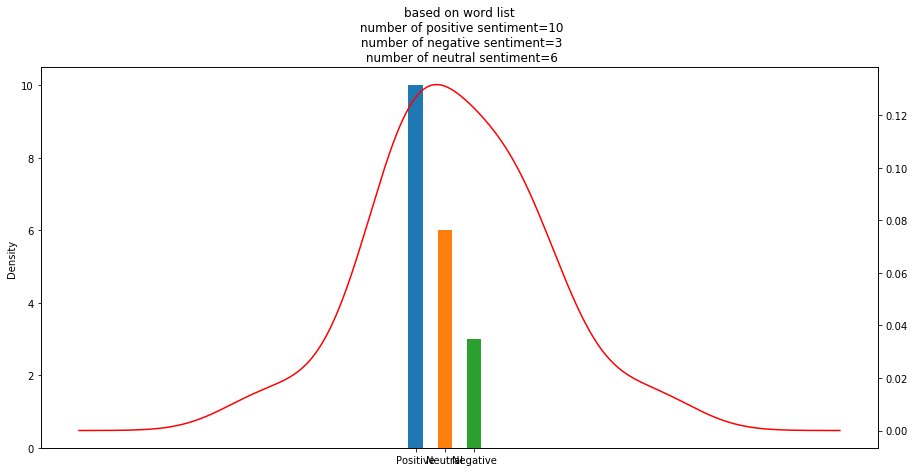

In [6]:
tweets_df=get_tweets(keywords=['modi', 'NDA', 'kejriwal', 'iot'], time_limit=5, location='India')

tweets_df_word_li,tweet_stat=plot_twitter_stats(tweets_df)
tweet_stat

### twitter historical  data

,0
number of negative revies,2208
number of neutral reviews,1943
number of positive reviews,4636
most negative sentiment,3453 VERY SAD TO SEE WICKED CONGRESS AND PR...
most positive sentiment,4363 @narendramodi Modi Jai my Indian pm to...


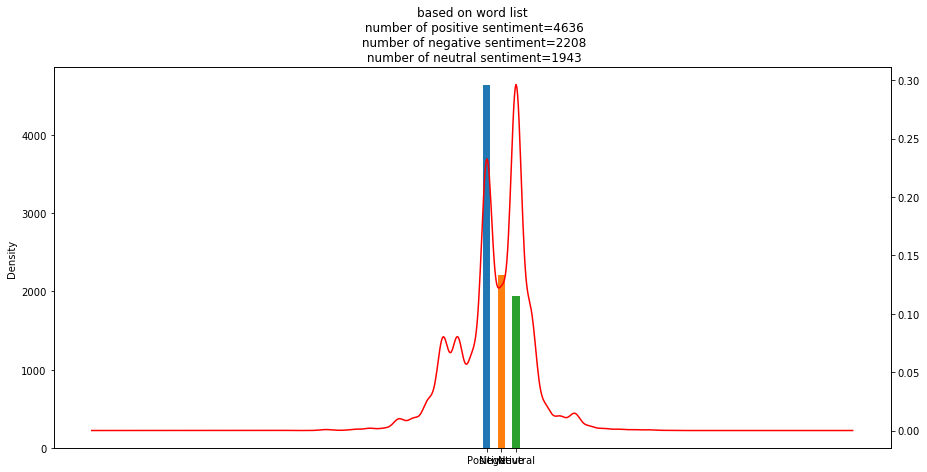

In [2]:
tweets_df=get_hist_tweets(q='modi', count=100, result_type='recent', location='bangalore', distance='100km', days=7)

tweets_df_word_li,tweet_stat=plot_twitter_stats(tweets_df)
tweet_stat